## Session 17: Data visualization with Matplotlib and Seaborn

So far we're learned how to deal with basic operations, data structures, control flow, functions, dataframes, etc.

Now it's time to learn how to visualize data.

We will learn the basics of data visualization with Matplotlib and Seaborn.

### Matplotlib

`matplotlib` is a library for data visualization. It is a very powerful library and it is the basis for many other data visualization libraries in Python.

Let's start by installing it, in a jupyter notebook cell:

```bash
!pip install matplotlib
```

Now let's import it:

```python
import matplotlib.pyplot as plt
```


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Matplotlib basic concepts

* Figure: the whole image
* Axes: the plot itself
* Axis: the x and y axis

### Matplotlib basic charts

* Line chart
* Bar chart
* Histogram
* Scatter plot
* Pie chart

But before diving into the charts we need to generate some data to plot.

In [2]:
# generate data

x_data = np.arange(-np.pi, np.pi, 0.1)

data = pd.DataFrame({
    "x": x_data,
    "y1": np.sin(x_data),
    "y2": np.cos(x_data),
    "y3": [x ** 2 + 1 for x in x_data],
    "y4": [2 * x + 5 + np.random.randn() * 0.2 for x in x_data],
    "n1": np.random.normal(0, 2, len(x_data)),
    "n2": np.random.normal(1, 4, len(x_data)),
    "l1": np.random.choice(
        a=[0, 1, 2],
        size=len(x_data),
        p=[0.5, 0.3, 0.2]
    ),
    "l2": np.random.choice(
        a=['a', 'b'],
        size=len(x_data),
        p=[0.6, 0.4]
    )
})

data.sample(5)


,x,y1,y2,y3,y4,n1,n2,l1,l2
55,2.358407,7.055403e-01,-0.708670,6.562085,9.799450,-4.026642,-5.702251,2,a
10,-2.141593,-8.414710e-01,-0.540302,5.586419,0.753787,1.151563,2.039396,0,a
33,0.158407,1.577457e-01,0.987480,1.025093,5.086234,-1.134857,8.593417,1,b
0,-3.141593,-1.224647e-16,-1.000000,10.869604,-1.344156,-4.983955,8.894526,0,a
61,2.958407,1.821625e-01,-0.983268,9.752174,11.123153,0.213633,-0.642030,1,a


### Line chart

This type of chart is used to show the evolution of a variable as another variable changes. For example, the evolution of the price of a stock as time passes.

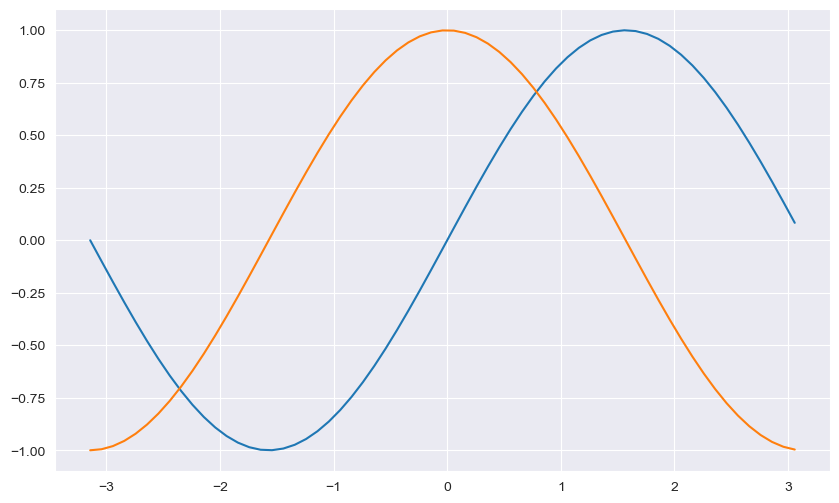

In [3]:
# line chart

plt.figure(figsize=(10, 6))
plt.plot(data['x'], data['y1'])
plt.plot(data['x'], data['y2'])
plt.show()

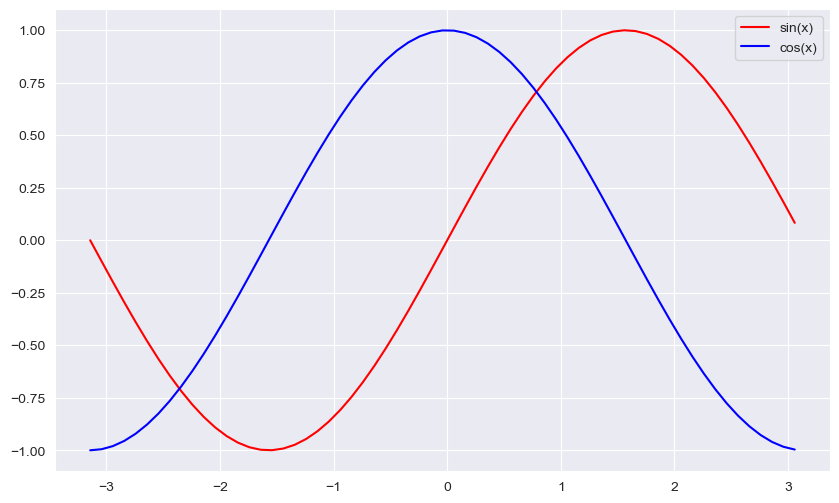

In [4]:
# change color
# colors in matplotlib: https://matplotlib.org/3.1.0/gallery/color/named_colors.html

plt.figure(figsize=(10, 6))
plt.plot(data['x'], data['y1'], label='sin(x)', color='red')
plt.plot(data['x'], data['y2'], label='cos(x)', color='blue')
plt.legend()
plt.show()

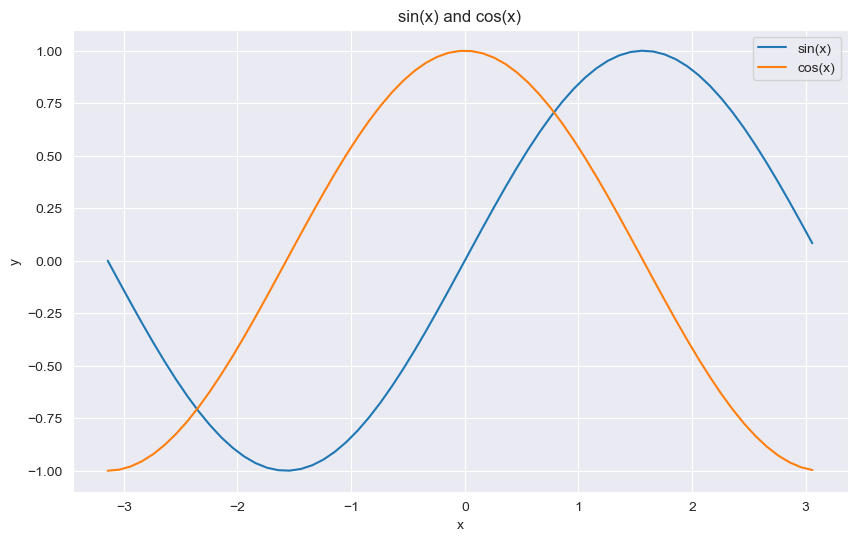

In [5]:
# line chart with legend and titles

plt.figure(figsize=(10, 6))
plt.plot(data['x'], data['y1'], label='sin(x)')
plt.plot(data['x'], data['y2'], label='cos(x)')
plt.title('sin(x) and cos(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

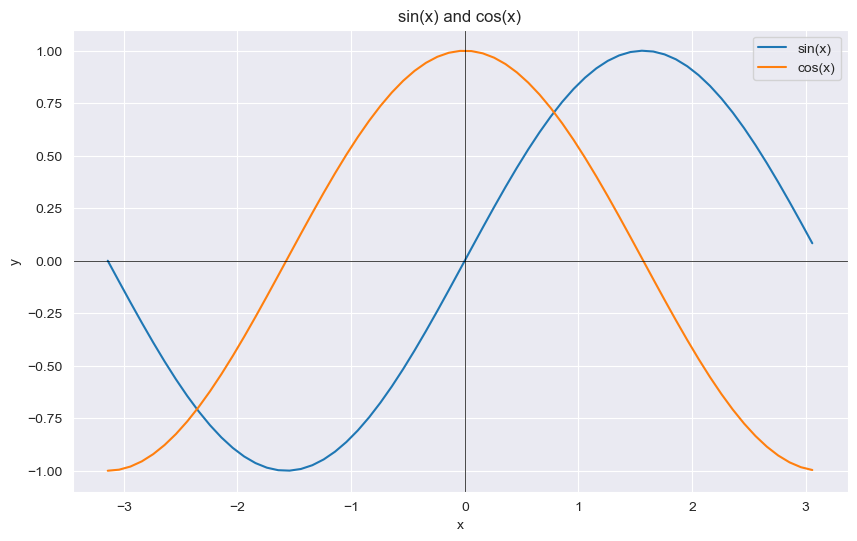

In [6]:
# line chart with legend and titles
# adding zero line

plt.figure(figsize=(10, 6))
plt.plot(data['x'], data['y1'], label='sin(x)')
plt.plot(data['x'], data['y2'], label='cos(x)')
plt.axvline(0, color='black', linewidth=0.5)
plt.axhline(0, color='black', linewidth=0.5)
plt.title('sin(x) and cos(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

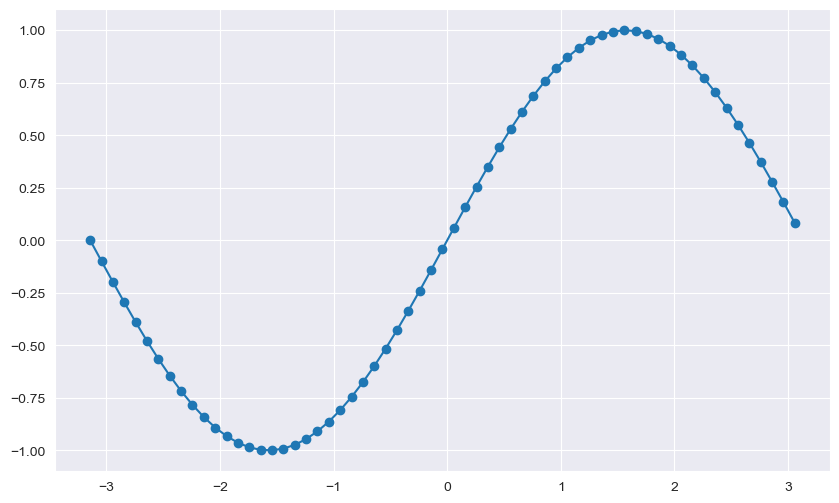

In [7]:
# adding markers
# markers in matplotlib: https://matplotlib.org/3.1.1/api/markers_api.html

plt.figure(figsize=(10, 6))
plt.plot(data['x'], data['y1'], label='sin(x)', marker='o')
plt.show()

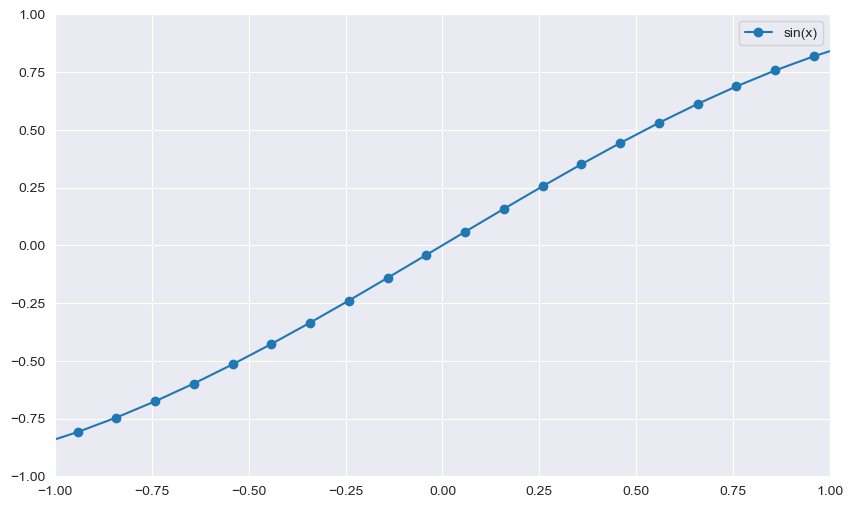

In [8]:
# only plotting a portion of the data

plt.figure(figsize=(10, 6))
plt.plot(data['x'], data['y1'], label='sin(x)', marker='o')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.legend()
plt.show()

### Bar chart

This type of chart is used to compare different categories. For example, the number of sales of different products.

In [9]:
gby = (
    data
    .groupby('l1', as_index=False)
    [['x', 'y1', 'y2']]
    .mean()
)

gby

,l1,x,y1,y2
0,0,-0.271322,-0.072074,0.040931
1,1,0.114657,0.078087,0.017607
2,2,0.558407,0.142433,-0.196421


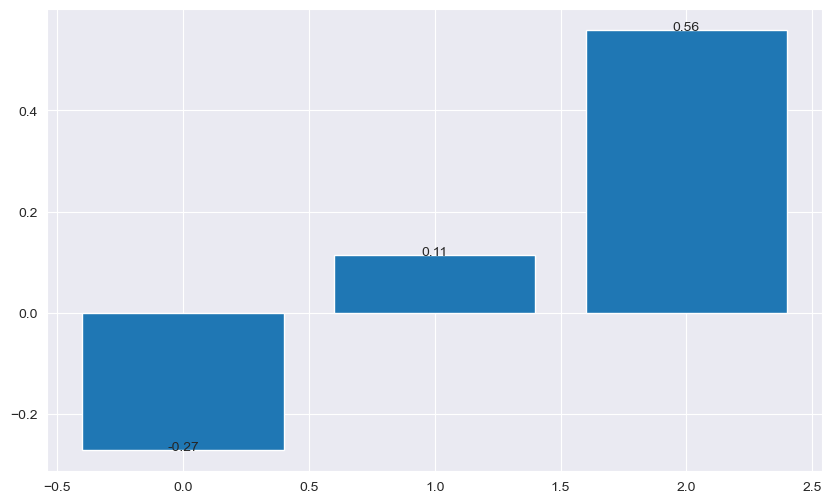

In [10]:
# basic bar chart with annotations

plt.figure(figsize=(10, 6))
plt.bar(gby['l1'], gby['x'])
for i, v in enumerate(gby['x']):
    plt.text(i, v, str(round(v, 2)), ha='center') 
plt.show()


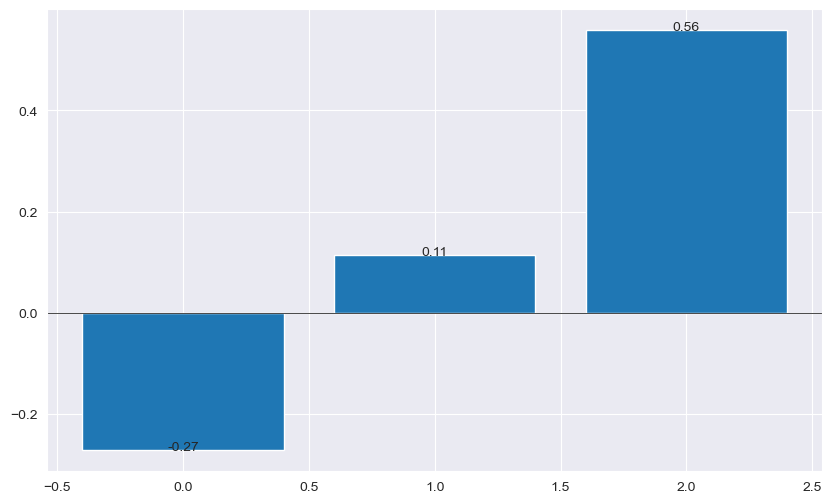

In [11]:
# add zero line

plt.figure(figsize=(10, 6))
plt.bar(gby['l1'], gby['x'])
plt.axhline(0, color='black', linewidth=0.5)
for i, v in enumerate(gby['x']):
    plt.text(i, v, str(round(v, 2)), ha='center')
plt.show()

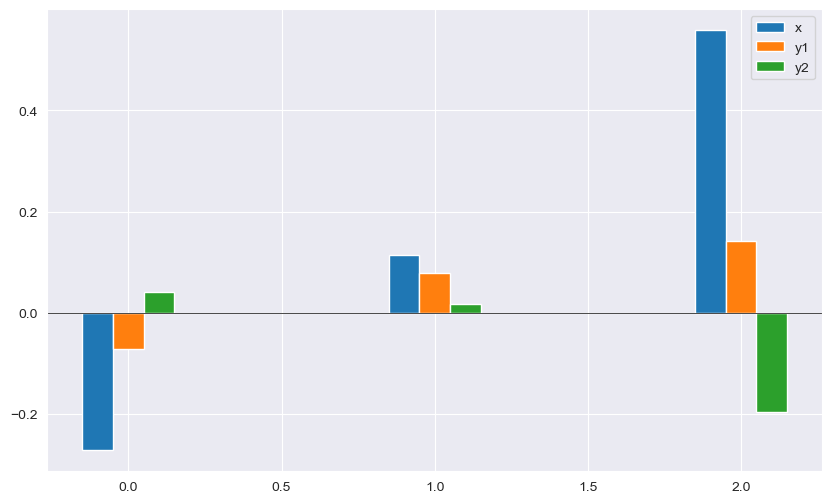

In [12]:
# several bar charts

plt.figure(figsize=(10, 6))
plt.bar(gby['l1'] - 0.1, gby['x'], width=0.1, label='x')
plt.bar(gby['l1'], gby['y1'], width=0.1, label='y1')
plt.bar(gby['l1'] + 0.1, gby['y2'], width=0.1, label='y2')
plt.axhline(0, color='black', linewidth=0.5)
plt.legend()
plt.show()


### Histogram

This type of chart is used to show the distribution of a variable. For example, the distribution of the height of a population.

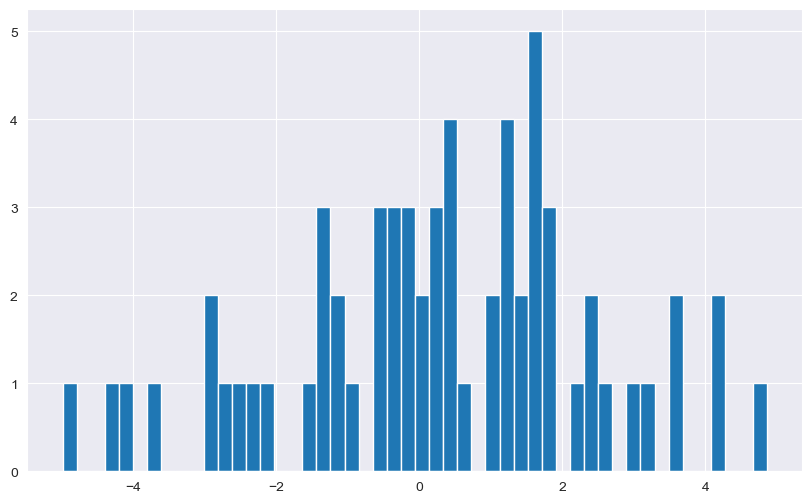

In [13]:
# histogram

plt.figure(figsize=(10, 6))
plt.hist(data['n1'], bins=50)
plt.show()


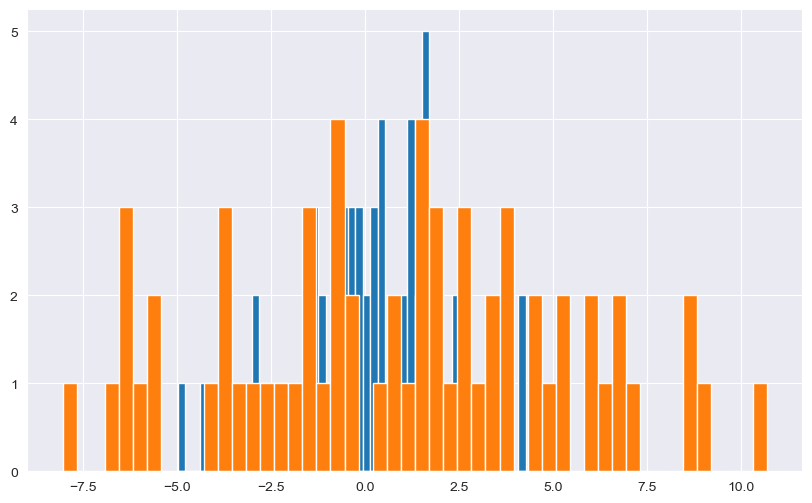

In [14]:
# several histograms

plt.figure(figsize=(10, 6))
plt.hist(data['n1'], bins=50)
plt.hist(data['n2'], bins=50)
plt.show()


### Scatter plot

This type of chart is used to show the relationship between two variables. For example, the relationship between the height and the weight of a population.

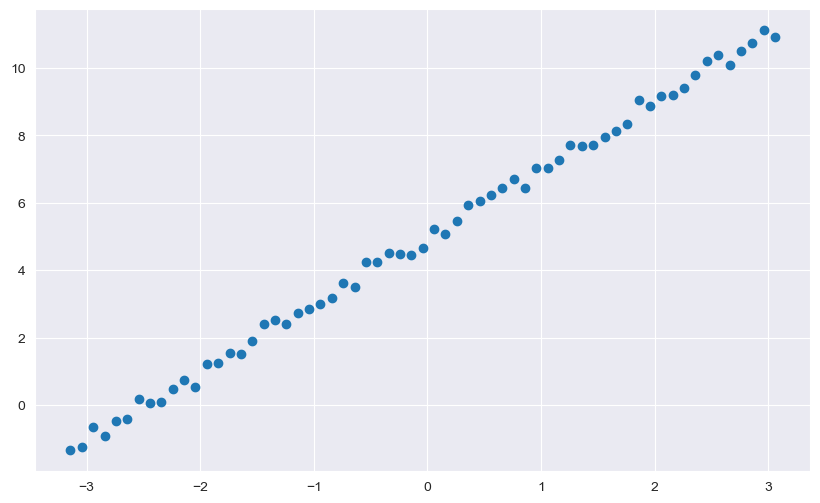

In [15]:
# scatter plot

plt.figure(figsize=(10, 6))
plt.scatter(data['x'], data['y4'])
plt.show()


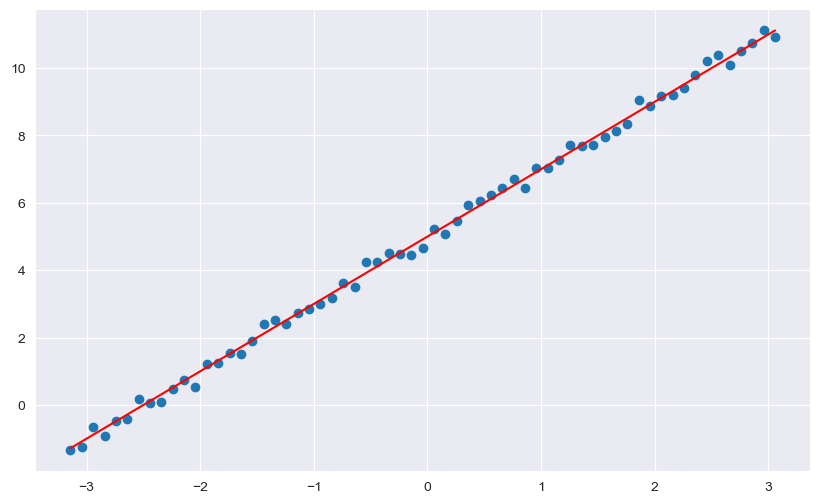

In [16]:
# add regression line
# in this case I know the slope and intercept, if not you can use np.polyfit

plt.figure(figsize=(10, 6))
plt.scatter(data['x'], data['y4'])
plt.plot(data['x'], 2 * data['x'] + 5, color='red')
plt.show()

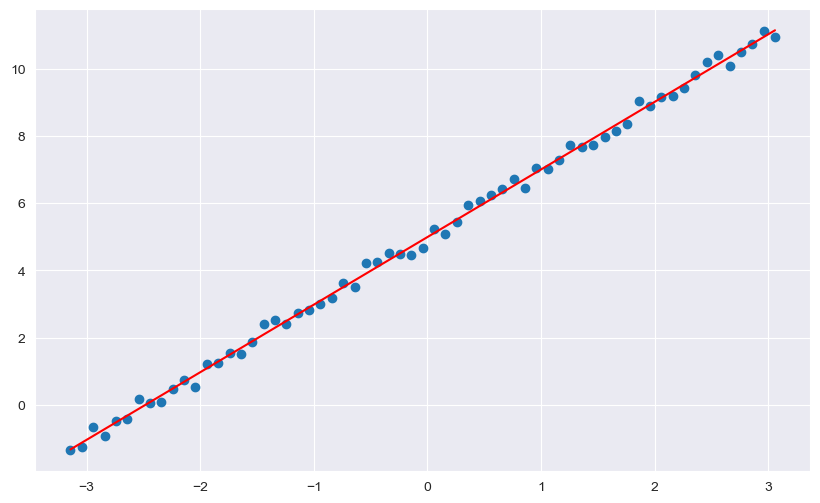

In [17]:
# add regression line using np.polyfit
# https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

plt.figure(figsize=(10, 6))
plt.scatter(data['x'], data['y4'])
plt.plot(
    data['x'], 
    np.polyfit(data['x'], data['y4'], 1)[0] * data['x'] + np.polyfit(data['x'], data['y4'], 1)[1], 
    color='red'
)
plt.show()


### Pie chart

This type of chart is used to show the distribution of a variable in percentages. For example, the percentage of sales of different products.

Not recommended, use bar charts instead.

In [18]:
pie_data = pd.DataFrame({
    "x": [1, 2, 3, 4],
    "y": [10, 20, 30, 40],
    "l1": ['a', 'b', 'c', 'd']
})

pie_data["pct"] = round(100 * pie_data["y"] / pie_data["y"].sum(), 0)

pie_data["pct %"] = pie_data["pct"].astype(str) + " %"

pie_data

,x,y,l1,pct,pct %
0,1,10,a,10.0,10.0 %
1,2,20,b,20.0,20.0 %
2,3,30,c,30.0,30.0 %
3,4,40,d,40.0,40.0 %


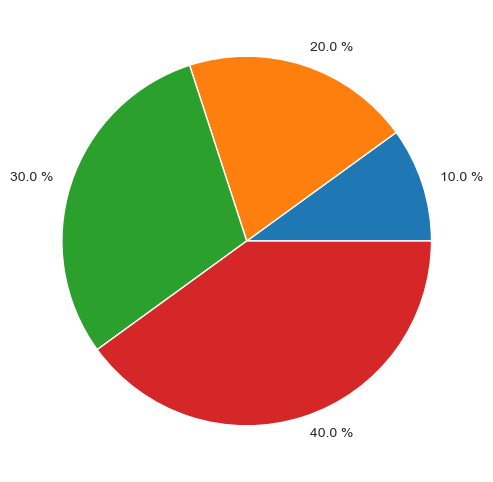

In [19]:
# pie chart

plt.figure(figsize=(10, 6))
plt.pie(pie_data['y'], labels=pie_data["pct %"])
plt.show()


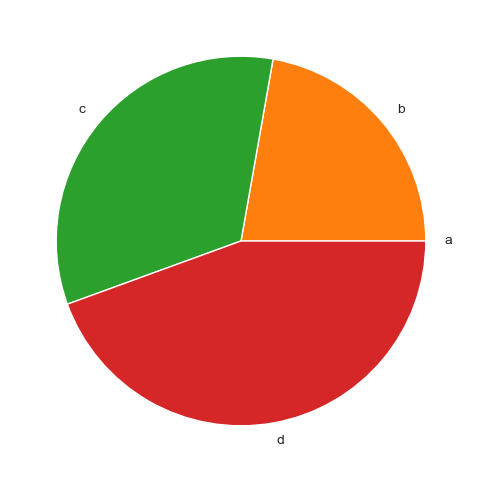

In [20]:
# it is not recommended for more than 2 categories or when categories contains small or missing values

pie_data = pd.DataFrame({
    "x": [1, 2, 3, 4],
    "y": [0, 20, 30, 40],
    "l1": ['a', 'b', 'c', 'd']
})

plt.figure(figsize=(10, 6))
plt.pie(pie_data['y'], labels=pie_data['l1'])
plt.show()


### Subplots in Matplotlib

Suplots are used to show different charts in the same figure, using a grid layout.

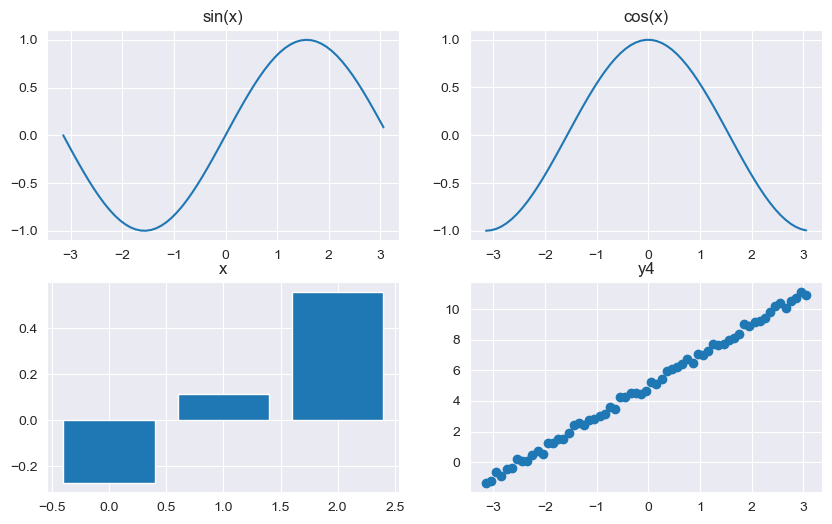

In [21]:
# subplot

fig, axs = plt.subplots(2, 2, figsize=(10, 6))

axs[0, 0].plot(data['x'], data['y1'])
axs[0, 0].set_title('sin(x)')

axs[0, 1].plot(data['x'], data['y2'])
axs[0, 1].set_title('cos(x)')

axs[1, 0].bar(gby['l1'], gby['x'])
axs[1, 0].set_title('x')

axs[1, 1].scatter(data['x'], data['y4'])
axs[1, 1].set_title('y4')

plt.show()


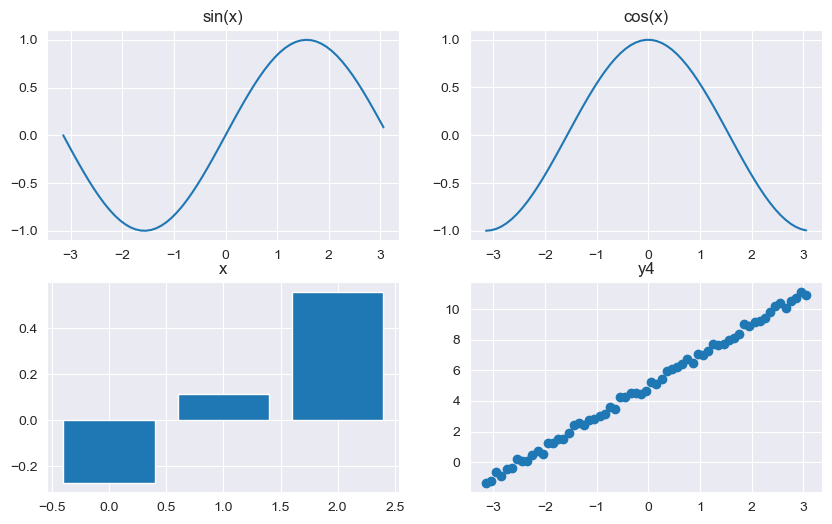

In [22]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 6))

ax1.plot(data['x'], data['y1'])
ax1.set_title('sin(x)')

ax2.plot(data['x'], data['y2'])
ax2.set_title('cos(x)')

ax3.bar(gby['l1'], gby['x'])
ax3.set_title('x')

ax4.scatter(data['x'], data['y4'])
ax4.set_title('y4')

plt.show()

### Saving a figure in Matplotlib

In `matplotlib` you can save a figure to a file using the `savefig` method.

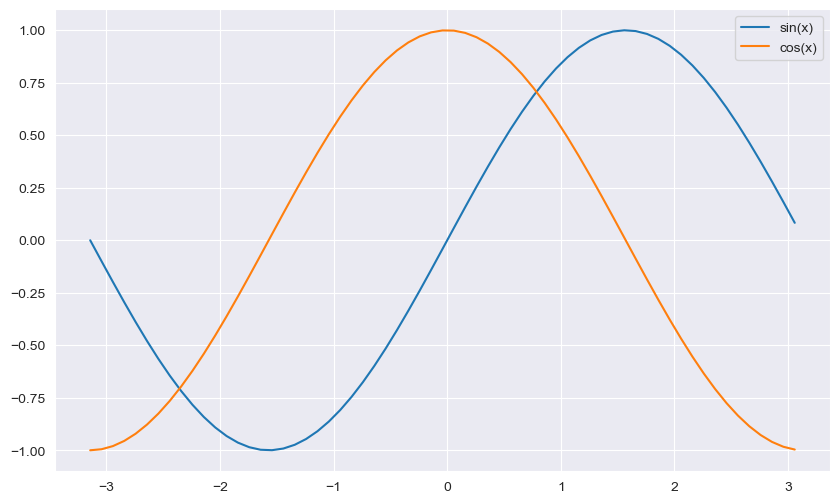

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(data['x'], data['y1'], label='sin(x)')
plt.plot(data['x'], data['y2'], label='cos(x)')
plt.legend()
plt.savefig('plot.png', dpi=300) # resolution 300 dots per inch
plt.show()

In the case of having subplots, you can save the figure to a file using the `savefig` method of the figure object (`fig`).

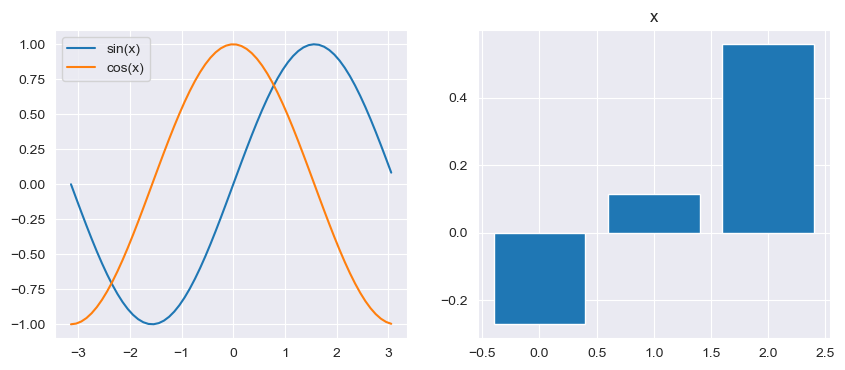

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].plot(data['x'], data['y1'], label='sin(x)')
axs[0].plot(data['x'], data['y2'], label='cos(x)')
axs[0].legend()

axs[1].bar(gby['l1'], gby['x'])
axs[1].set_title('x')

fig.savefig('subplots.png', dpi=600)

plt.show()

## Seaborn

Seaborn is a library for data visualization. It is based on Matplotlib and it is more user friendly, and its charts are more beautiful.

Let's start by installing it, in a jupyter notebook cell:

```bash
!pip install seaborn
```

Now let's import it:

```python
import seaborn as sns
```

https://seaborn.pydata.org/tutorial.html

In [25]:
import seaborn as sns

### Line chart with Seaborn

<Axes: xlabel='x', ylabel='y1'>

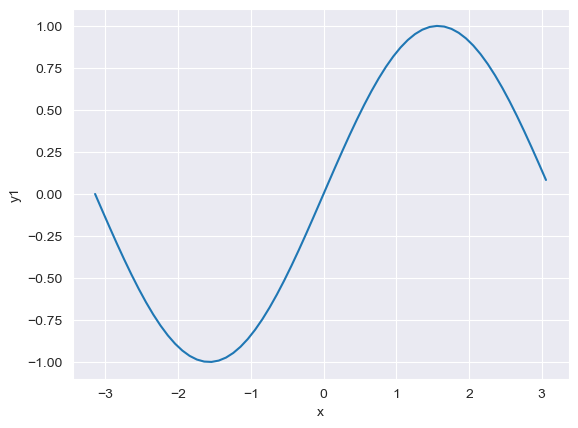

In [26]:
# line plot with seaborn

sns.lineplot(data=data, x='x', y='y1')

### Bar chart with Seaborn

<Axes: xlabel='l1', ylabel='x'>

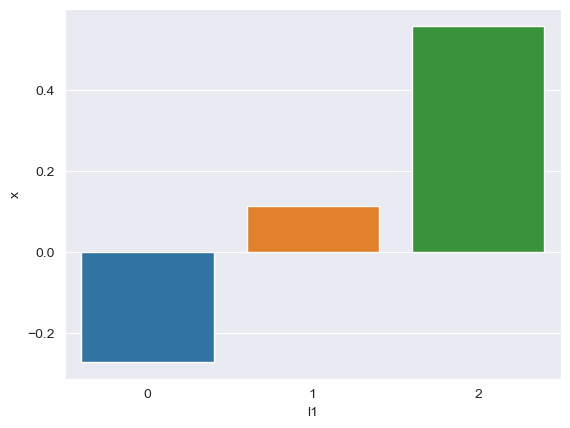

In [27]:
# bar plot with seaborn

sns.barplot(data=gby, x='l1', y='x')

### Histogram with Seaborn


<Axes: xlabel='n1', ylabel='Count'>

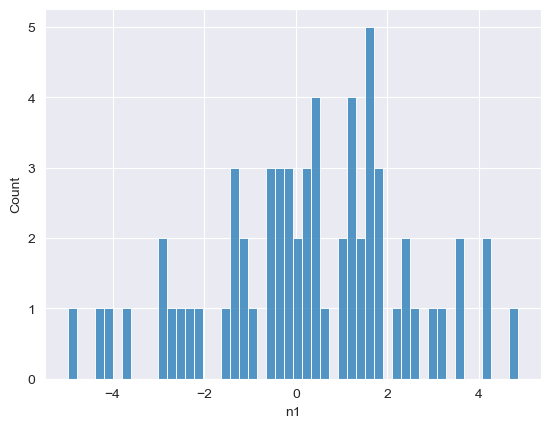

In [28]:
# histogram with seaborn

sns.histplot(data=data, x='n1', bins=50)

<Axes: xlabel='n1', ylabel='Count'>

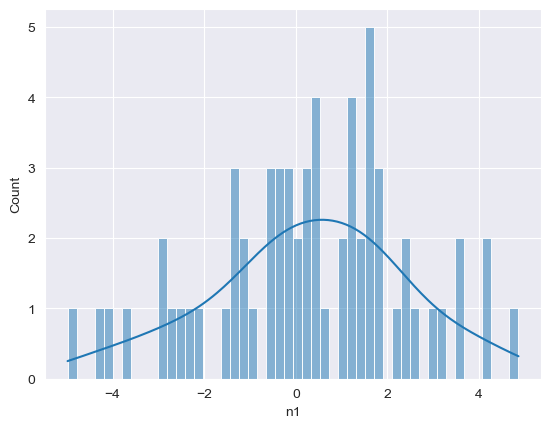

In [29]:
# using kde (kernel density estimation)
# more on kde: https://en.wikipedia.org/wiki/Kernel_density_estimation

sns.histplot(data=data, x='n1', bins=50, kde=True)

### Scatter plot with Seaborn

<Axes: xlabel='x', ylabel='y4'>

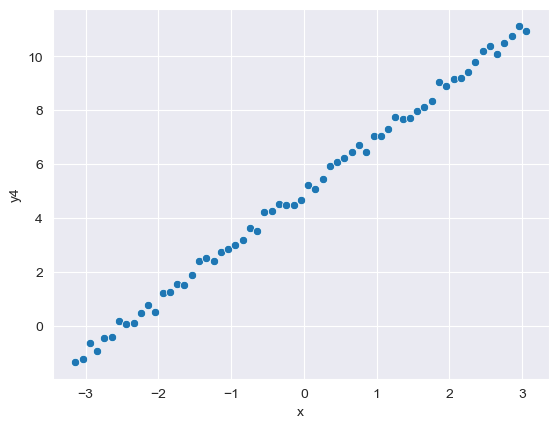

In [30]:
# scatter plot with seaborn

sns.scatterplot(data=data, x='x', y='y4')

<Axes: xlabel='x', ylabel='y4'>

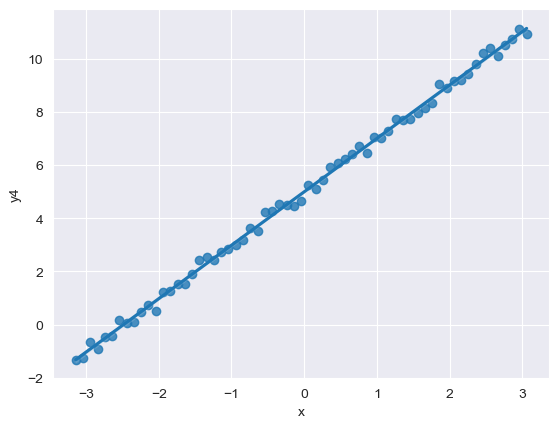

In [31]:
# regression line with seaborn

sns.regplot(data=data, x='x', y='y4')

<Axes: xlabel='x', ylabel='y4'>

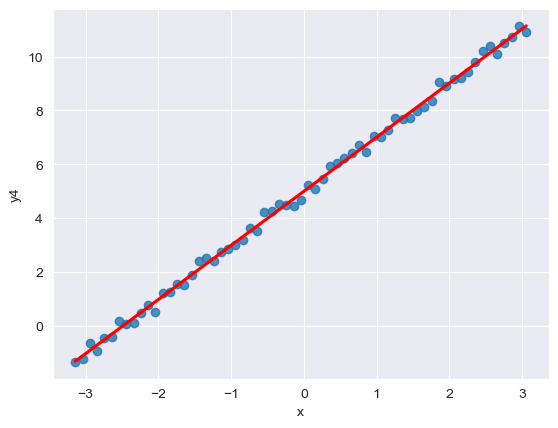

In [32]:
# tuning the regression line

sns.regplot(data=data, x='x', y='y4', ci=None, line_kws={'color': 'red'})

### Pie chart with Seaborn

In [33]:
# pie chart with seaborn

sns.pieplot(data=pie_data, x='y', labels=pie_data["pct %"])

# luckily, seaborn does not 

AttributeError: module 'seaborn' has no attribute 'pieplot'

### Other charts with Seaborn

* Box plot: used to show the distribution of a variable in quartiles.
* Violin plot: used to show the distribution of a variable in quartiles, but also the distribution of the data.
* Swarm plot: mix between a scatter plot and a violin plot.
* Heatmap: chart that displays a matrix of values using colors.


In [ ]:
# boxplot with seaborn

sns.boxplot(data=data, x='l1', y='n1')

In [ ]:
# violinplot

sns.violinplot(data=data, x='l1', y='n1')

In [ ]:
# swarmplot

sns.swarmplot(data=data, x='l1', y='n1')

In [ ]:
# heatmap

sns.heatmap(data=data.corr(), annot=True)

## Seaborn faceted charts

One of the most powerful features of Seaborn is the ability to create faceted charts. These charts are used to show the same chart for different categories.

We are going to focus on the following charts:

* Pairplot: scatter plot for all the variables in a dataframe, and histograms in the diagonal.
* Facetgrid: grid of charts for different categories, similar functionality to subplots in Matplotlib.





### Seaborn Pairplot

Pairplot is used to show the relationship between all the variables in a dataframe, and the distribution of each variable in the diagonal.

We can use it to find relationships between variables and for initial data exploration.

In [ ]:
# pairplot

sns.pairplot(data[['x', 'y1', 'y2', 'y3', 'y4']])

In [ ]:
# change color of diagonal

sns.pairplot(data[['x', 'y1', 'y2', 'y3', 'y4']], diag_kws={'color': 'red'})

In [ ]:
# use KDE instead of histogram

sns.pairplot(data[['x', 'y1', 'y2', 'y3', 'y4']], diag_kind='kde')

In [ ]:
# only include lower triangle, and add transparency (alpha)

sns.pairplot(data[['x', 'y1', 'y2', 'y3', 'y4']], diag_kind='kde', plot_kws={'alpha': 0.2}, diag_kws={'color': 'red'}, corner=True)

### Facetgrid

Facetgrid is used to show the same chart for different categories, in a grid layout.

In [ ]:
# facetgrid

g = sns.FacetGrid(data, col='l1', row='l2', hue='l1')
g.map(plt.hist, 'x')